# Define the system  

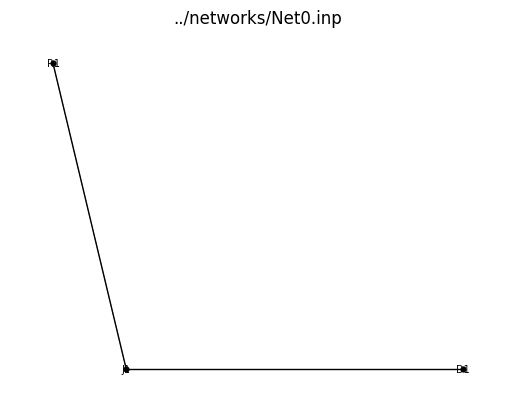

<Axes: title={'center': '../networks/Net0.inp'}>

In [1]:
import wntr
import wntr_quantum
import numpy as np

# Create a water network model
inp_file = '../networks/Net0.inp'
# inp_file = '../networks/Net2LoopsDW.inp'
wn = wntr.network.WaterNetworkModel(inp_file)

# Graph the network
wntr.graphics.plot_network(wn, title=wn.name, node_labels=True)


## Run with the original Cholesky EPANET simulator

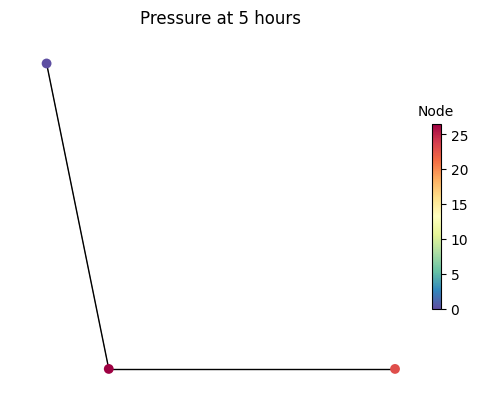

<Axes: title={'center': 'Pressure at 5 hours'}>

In [2]:
sim = wntr.sim.EpanetSimulator(wn)
results = sim.run_sim()
# Plot results on the network
pressure_at_5hr = results.node['pressure'].loc[0, :]
wntr.graphics.plot_network(wn, node_attribute=pressure_at_5hr, node_size=50,
                        title='Pressure at 5 hours', node_labels=False)

In [3]:
ref_pressure = results.node['pressure'].values[0][:2]
ref_pressure

array([26.477, 22.954], dtype=float32)

In [4]:
ref_rate = results.link['flowrate'].values[0]
ref_rate

array([0.05, 0.05], dtype=float32)

In [5]:
ref_values = np.append(ref_rate, ref_pressure)
ref_values

array([ 0.05 ,  0.05 , 26.477, 22.954], dtype=float32)

## Run with our custom Cholesky EPANET solver 
we use the default solver of the QuantumWNTRSimulator, that uses a LU solver, a s a benchmark of the calculation

/home/nico/QuantumApplicationLab/vitens/wntr-quantum/wntr_quantum/epanet/Linux/libepanet22_amd64.so
Flow :     0.528372
Roughness: 0.000164
Diameter:  0.820210
Viscosity: 0.000011
Re Number: 58562.855181
DW - TURBULENT
DW - Friction factor : 0.019984
DW - Resistance coeff : 222.481640

Flow :     0.528372
Roughness: 0.000164
Diameter:  0.820210
Viscosity: 0.000011
Re Number: 58562.855181
DW - TURBULENT
DW - Friction factor : 0.019984
DW - Resistance coeff : 222.481640

Reservoir : 98.425197
Flow :     1.765728
Roughness: 0.000164
Diameter:  0.820210
Viscosity: 0.000011
Re Number: 195706.877298
DW - TURBULENT
DW - Friction factor : 0.016664
DW - Resistance coeff : 222.481640

Flow :     1.765726
Roughness: 0.000164
Diameter:  0.820210
Viscosity: 0.000011
Re Number: 195706.600113
DW - TURBULENT
DW - Friction factor : 0.016664
DW - Resistance coeff : 222.481640

Reservoir : 98.425197
Flow :     1.765728
Roughness: 0.000164
Diameter:  0.820210
Viscosity: 0.000011
Re Number: 195706.842128
D

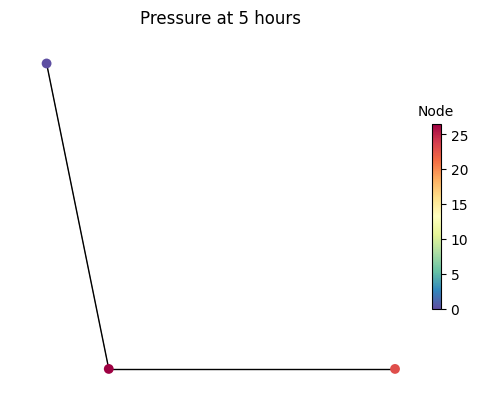

<Axes: title={'center': 'Pressure at 5 hours'}>

In [6]:
import os 
os.environ["EPANET_TMP"] = "/home/nico/.epanet_quantum"
os.environ["EPANET_QUANTUM"] = "/home/nico/QuantumApplicationLab/vitens/EPANET"
sim = wntr_quantum.sim.QuantumEpanetSimulator(wn)
results = sim.run_sim()
# Plot results on the network
pressure_at_5hr = results.node['pressure'].loc[0, :]
wntr.graphics.plot_network(wn, node_attribute=pressure_at_5hr, node_size=50,
                        title='Pressure at 5 hours', node_labels=False)

In [7]:
results.node['pressure']

name,J1,D1,R1
0,26.476900,22.953815,-9.338379e-07
3600,26.476925,22.953840,-9.338379e-07


In [8]:
results.link['flowrate']

name,P1,P2
0,0.05,0.05
3600,0.05,0.05


## Run with the Nework QUBO solver

In [9]:
from wntr_quantum.sim.qubo_polynomial_solver import QuboPolynomialSolver
from qubols.solution_vector import SolutionVector_V2 as SolutionVector
from qubols.encodings import  RangedEfficientEncoding, PositiveQbitEncoding

nqbit = 9
step = (0.25/(2**nqbit-1))
flow_encoding = PositiveQbitEncoding(nqbit=nqbit, step=step, offset=+0.0, var_base_name="x")

nqbit = 9
step = (250/(2**nqbit-1))
head_encoding = PositiveQbitEncoding(nqbit=nqbit, step=step, offset=+0.0, var_base_name="x")

net = QuboPolynomialSolver(wn, flow_encoding=flow_encoding, 
              head_encoding=head_encoding)

In [10]:
ref_sol = net.classical_solutions()

/home/nico/QuantumApplicationLab/QuantumNewtonRaphson/quantum_newton_raphson/utils.py:74: SparseEfficiencyWarning: spsolve requires A be CSC or CSR matrix format
  warn("spsolve requires A be CSC or CSR matrix format", SparseEfficiencyWarning)


In [11]:
net.matrices

(array([[ 0.   ],
        [ 1.766],
        [99.077],
        [ 0.652]]),
 array([[-1.   ,  1.   ,  0.   ,  0.   ],
        [ 0.   , -1.   ,  0.   ,  0.   ],
        [-1.547,  0.   , -1.   ,  0.   ],
        [ 0.   , -1.547,  1.   , -1.   ]]),
 array([[[ 0.   ,  0.   ,  0.   ,  0.   ],
         [ 0.   ,  0.   ,  0.   ,  0.   ],
         [ 0.   ,  0.   ,  0.   ,  0.   ],
         [ 0.   ,  0.   ,  0.   ,  0.   ]],
 
        [[ 0.   ,  0.   ,  0.   ,  0.   ],
         [ 0.   ,  0.   ,  0.   ,  0.   ],
         [ 0.   ,  0.   ,  0.   ,  0.   ],
         [ 0.   ,  0.   ,  0.   ,  0.   ]],
 
        [[-3.063,  0.   ,  0.   ,  0.   ],
         [ 0.   ,  0.   ,  0.   ,  0.   ],
         [ 0.   ,  0.   ,  0.   ,  0.   ],
         [ 0.   ,  0.   ,  0.   ,  0.   ]],
 
        [[ 0.   ,  0.   ,  0.   ,  0.   ],
         [ 0.   , -3.063,  0.   ,  0.   ],
         [ 0.   ,  0.   ,  0.   ,  0.   ],
         [ 0.   ,  0.   ,  0.   ,  0.   ]]]))

In [13]:
from wntr_quantum.sim.qubo_polynomial_solver import QuboPolynomialSolver
from qubols.solution_vector import SolutionVector_V2 as SolutionVector
from qubols.encodings import  RangedEfficientEncoding, PositiveQbitEncoding

nqbit = 9
step = (0.5/(2**nqbit-1))
flow_encoding = PositiveQbitEncoding(nqbit=nqbit, step=step, offset=+1.5, var_base_name="x")

nqbit = 9
step = (50/(2**nqbit-1))
head_encoding = PositiveQbitEncoding(nqbit=nqbit, step=step, offset=+50.0, var_base_name="x")

net = QuboPolynomialSolver(wn, flow_encoding=flow_encoding, 
              head_encoding=head_encoding)
net.verify_encoding()

Head Encoding : 50.000000 => 100.000000 (res: 0.097847)
Flow Encoding : 1.500000 => 2.000000 (res: 0.000978)


In [14]:
from qubols.mixed_solution_vector import MixedSolutionVector_V2 as MixedSolutionVector
from qubols.qubo_poly_mixed_variables import QUBO_POLY_MIXED
from qubols.solution_vector import SolutionVector_V2 as SolutionVector
import sparse

from dwave.samplers import SimulatedAnnealingSampler
from dwave.samplers import SteepestDescentSolver
from dwave.samplers import TabuSampler
from dimod import ExactSolver

sampler = TabuSampler()
sampler = SteepestDescentSolver()
# sampler = SimulatedAnnealingSampler()
# sampler = ExactSolver() 

qubo = QUBO_POLY_MIXED(net.mixed_solution_vector,  options={"sampler" : sampler} )
matrices = tuple(sparse.COO(m) for m in net.matrices)
bqm = qubo.create_bqm(matrices, strength=1E6)
sampleset = qubo.sample_bqm(bqm, num_reads=10000)
sol = qubo.decode_solution(sampleset.lowest().record[0][0])
sol = net.flatten_solution_vector(sol)


In [15]:
sol = net.convert_solution_to_si(sol)

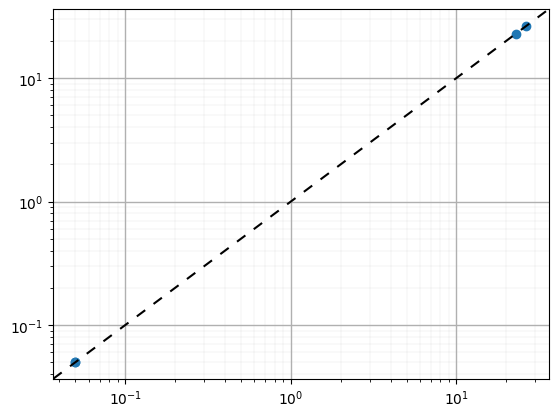

In [16]:
net.plot_solution_vs_reference(sol, ref_sol)

In [17]:
net.benchmark_solution(sol, ref_sol, qubo, bqm)

Head Encoding : 50.000000 => 100.000000 (res: 0.097847)
Flow Encoding : 1.500000 => 2.000000 (res: 0.000978)


Error (%): [-0.577 -0.744  0.007  0.158]


sol :  [ 1.776  1.779 86.791 75.049]
ref :  [ 1.766  1.766 86.797 75.168]
diff:  [-0.01  -0.013  0.006  0.119]


encoded_sol:  [ 1.776  1.779 86.791 75.049]
encoded_ref:  [ 1.766  1.766 86.791 75.147]
diff       :  [-0.01  -0.013  0.     0.098]


E sol   :  -1662.5890489845583
R ref   :  -1662.606102046081
Delta E : 0.017053061522801727


Residue sol   :  0.13098406084618344
Residue ref   :  0.010186471203764017
Delta Residue : 0.12079758964241942


In [ ]:
net.m.set_structure()

In [ ]:
net.m.get_x()

array([0.   , 0.   , 0.001, 0.001])